Alessio's code for Kentucky water network
====

In [1]:
import wntr
from wntr.epanet.toolkit import EpanetException

import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import matplotlib.colors

import pickle

In [2]:
# just set a code for the color
def nodes_colors_dataframe(wn, highlighted_nodes):
    df = {}
    for node in wn.get_graph():        
        if 'Reservoir' in wn.get_node(node).node_type:
            df[node] = [3]
        elif 'Tank' in wn.get_node(node).node_type:
            df[node] = [2]  
        elif node in highlighted_nodes:
            df[node] = [0]            
        else:
            df[node] = [1]     
    return pd.DataFrame(data=df)


def print_wdn(wn, highlighted_nodes = [], filename = None):
    node_colors = nodes_colors_dataframe(wn, highlighted_nodes).loc[0, :]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","cyan","blue"], gamma=0.8)
    fig, ax1 = plt.subplots(figsize=(25,25))
    ax1.axis('off')
    wntr.graphics.plot_network(wn, node_attribute=node_colors, node_size=250, node_range=[0,3], add_colorbar=False,
                               node_cmap=cmap, ax=ax1)#, title='Reservoirs and Tanks')
 
    if filename:
        plt.savefig(filename, format='eps', dpi=1000)

In [3]:
# load .inp file
code = "ky2"
filename = '../data/kentucky_water_distribution_networks/'+code+'.inp'
wn = wntr.network.WaterNetworkModel(filename)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


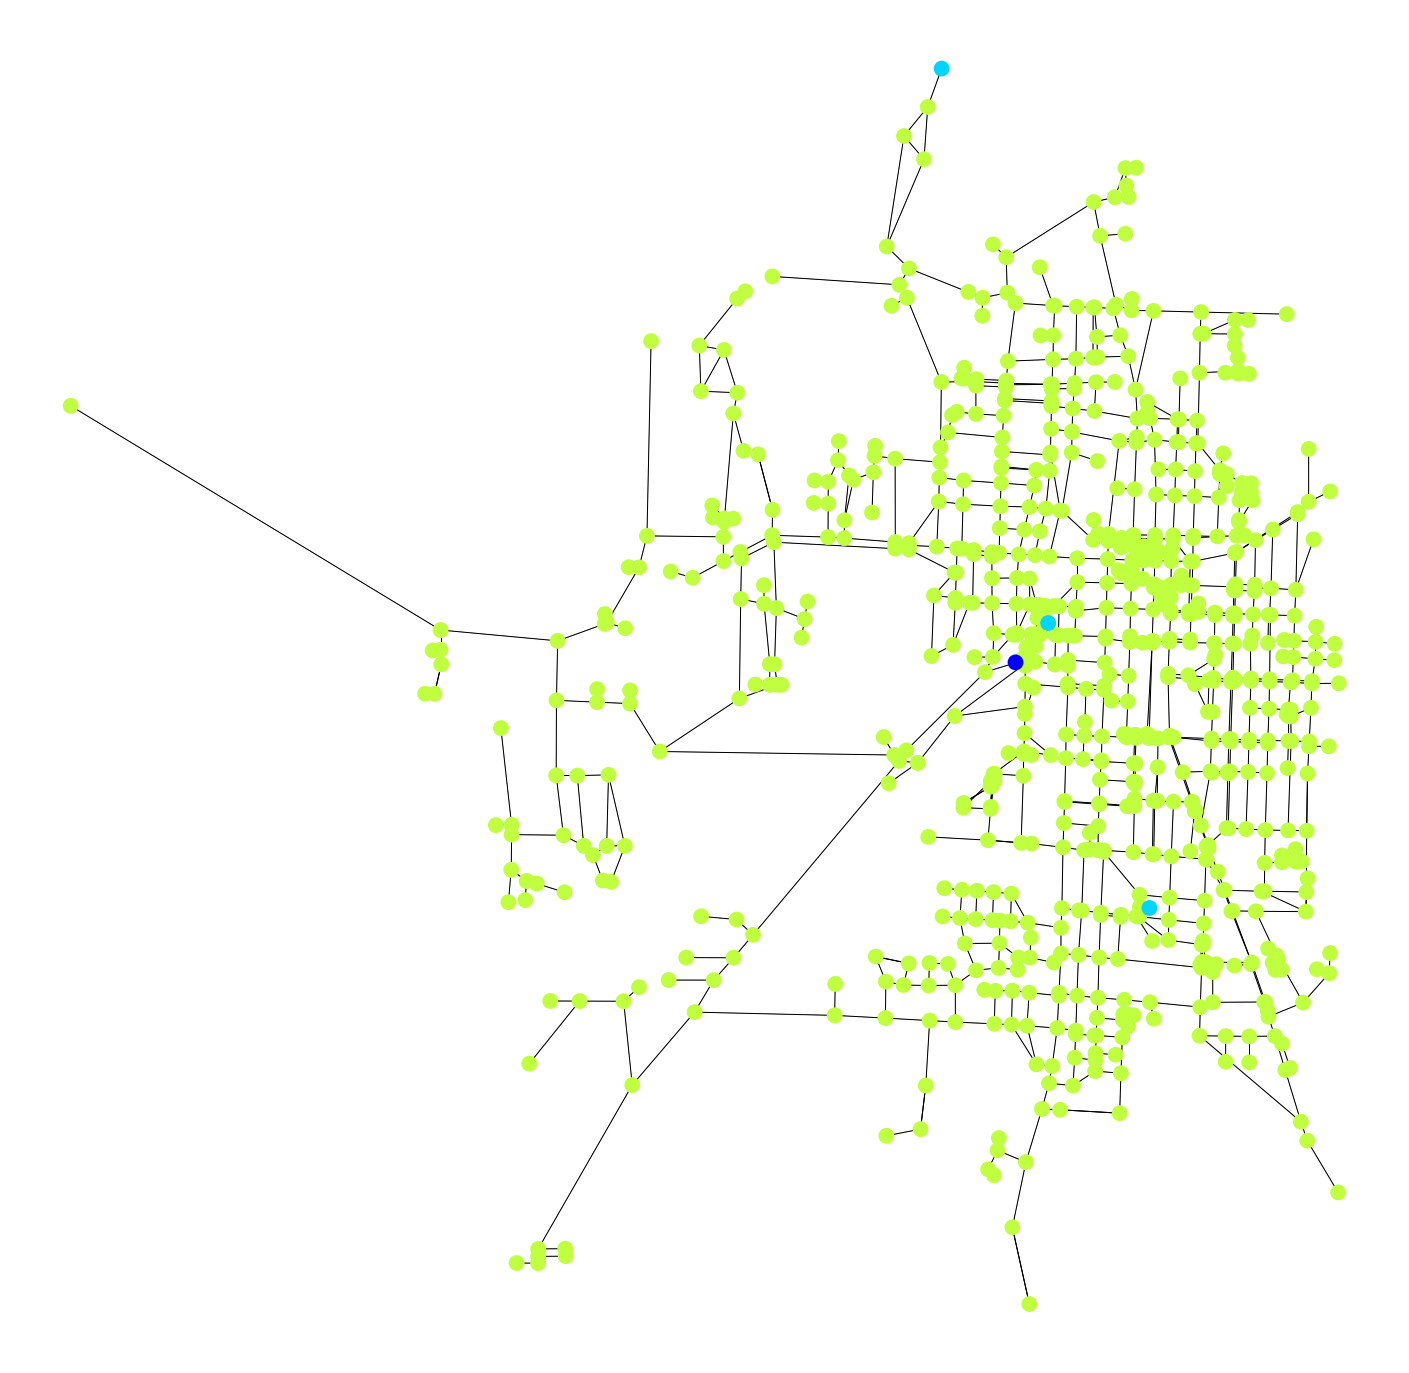

In [4]:
# Print the WDN
print_wdn(wn)

In [5]:
type(wn)

wntr.network.model.WaterNetworkModel

In [6]:
wn.get_node('J-108').demand_timeseries_list # Node demand

<Demands: [<TimeSeries: base=0.00032743811931600005, pattern='1', category='None'>]>

In [7]:
# Get the NetworkX graph
G = wn.get_graph()

In [8]:
# Edge properties
G.adj['J-1'] # Linked nodes to J-1

AdjacencyView({'T-3': {'P-1': {'type': 'Pipe'}}, 'J-62': {'P-630': {'type': 'Pipe'}}})

In [9]:
# Node propreties
G.node['J-1']

{'pos': (4071494.75, 3449266.0), 'type': 'Junction'}

In [10]:
# Load dynamics
filename = "../data/kentucky_water_distribution_networks/Ky2.pkl"
with open(filename, 'rb') as input_file:
    pollution = pickle.load(input_file)

The key of the dictionary corresponds to the node where there is the pollution injection, the injection starts at t = 3600 seconds and lasts for 1 hour (t = 7200 seconds).

In [11]:
pollution['J-10'] # Pollution injection at "J-10"

name,J-1,J-10,J-100,J-101,J-102,J-103,J-104,J-105,J-106,J-107,...,J-96,J-97,J-98,J-99,O-Pump-1,I-Pump-1,R-1,T-1,T-2,T-3
3300,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3330,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3360,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3390,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3420,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3450,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3480,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3510,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3540,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0
3570,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.0


Bokeh version of the network
====

In [12]:
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.models import Range1d, Plot, MultiLine, Circle, HoverTool, StaticLayoutProvider, GraphRenderer
from bokeh.palettes import Spectral4
from bokeh.io import show, output_notebook, curdoc
import math
output_notebook()

Loading BokehJS ...

In [13]:
# Create plottable coordinates
x = []
y = []
xs = []
ys = []
nodes_dict = dict(G.nodes)
for node_name, node_data in nodes_dict.items():
    
    node_x_edge_points = [node_data['pos'][0]]
    node_y_edge_points = [node_data['pos'][1]]
    
    for linked_node, linked_node_desc_data in G.adj[node_name].items():
        linked_node_data = nodes_dict[linked_node]
        node_x_edge_points.append(linked_node_data['pos'][0])
        node_y_edge_points.append(linked_node_data['pos'][1])
        
    xs.append(node_x_edge_points)
    ys.append(node_y_edge_points)
        
    x.append(node_data['pos'][0])
    y.append(node_data['pos'][1])

px = [(i - min(x)) / (max(x) - min(x)) for i in x]
py = [(i - min(y)) / (max(y) - min(y)) for i in y]
pxs = []
pys = []
for edge in xs:
    pxs.append([(i - min(x)) / (max(x) - min(x)) for i in edge])
for edge in ys:
    pys.append([(i - min(y)) / (max(y) - min(y)) for i in edge])

In [14]:
N = len(G.nodes())
node_indices = list(range(N))

plot = Plot(x_range=Range1d(-0.1, 1.1), y_range=Range1d(-0.1, 1.1))

graph = GraphRenderer()

# Create nodes and edges
graph.node_renderer.data_source.add(node_indices, 'index')
graph.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
graph.edge_renderer.glyph = MultiLine(line_alpha=1.6, line_width=0.5)

graph.edge_renderer.data_source.data = dict(
    start=[0]*N,
    end=node_indices)

graph_layout = dict(zip(node_indices, zip(px, py)))
graph.layout_provider = StaticLayoutProvider(graph_layout=graph_layout)

graph.edge_renderer.data_source.data['xs'] = pxs
graph.edge_renderer.data_source.data['ys'] = pys

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=2, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=1)

# When we hover over nodes, highlight adjecent edges too
graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()

TOOLTIPS = [
        ("Node", "@index"),

    ]

plot.add_tools(HoverTool())

plot.renderers.append(graph)
show(plot)

In [17]:
locations = {}
i = 0
for node_name, node_data in nodes_dict.items():
    locations[node_name] = (px[i], py[i])
    i+=1
netx_graph = from_networkx(G, locations)
netx_plot = Plot(x_range=Range1d(-0.1, 1.1), y_range=Range1d(-0.1, 1.1))

# Create nodes and edges
netx_graph.node_renderer.glyph = Circle(size=2, fill_color=Spectral4[0])
netx_graph.edge_renderer.glyph = MultiLine(line_alpha=1.6, line_width=0.5)

# green hover for both nodes and edges
netx_graph.node_renderer.hover_glyph = Circle(size=2, fill_color='#abdda4')
netx_graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=1)

# When we hover over nodes, highlight adjecent edges too
netx_graph.selection_policy = NodesAndLinkedEdges()
netx_graph.inspection_policy = EdgesAndLinkedNodes()

TOOLTIPS = [
        ("Type", "@type"),

    ]

netx_plot.add_tools(HoverTool(tooltips=TOOLTIPS))

netx_plot.renderers.append(netx_graph)
show(netx_plot)